# Exploratory Data Analysis

The focus of this analysis is to explore and analyze the delivery delays of orders in a Brazilian e-commerce marketplace. We will identify patterns related to late deliveries, look for factors that could influence delays.

#### Data Loading


In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the processed data
import os

current_dir = os.getcwd()
processed_path = os.path.abspath(os.path.join(current_dir, "..", "data", "processed"))

# Loading the main dataset
orders = pd.read_csv(os.path.join(processed_path, "orders.csv"))
print("'orders.csv' loaded suceccessfully")
print(orders.shape)

'orders.csv' loaded suceccessfully
(92909, 10)


#### Initial Data Overview and type checking

Before diving into deeper analysis, it's essential to explore the structure of the dataset. Looking for aspects that helps guide decisions in the Exploratory Data Analysis (EDA) process.

In [5]:
# Check general info about the dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92909 entries, 0 to 92908
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       92909 non-null  object 
 1   customer_id                    92909 non-null  object 
 2   order_status                   92909 non-null  object 
 3   order_purchase_timestamp       92909 non-null  object 
 4   order_approved_at              92821 non-null  object 
 5   order_delivered_carrier_date   91259 non-null  object 
 6   order_delivered_customer_date  90125 non-null  object 
 7   order_estimated_delivery_date  92909 non-null  object 
 8   order_purchase_month           92909 non-null  object 
 9   delivery_time                  90125 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.1+ MB


In [8]:
# Converting date columns from object to datetime.
date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# Converting "order status" column from object to category
orders["order_status"] = orders["order_status"].astype("category")

# Checking
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92909 entries, 0 to 92908
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       92909 non-null  object        
 1   customer_id                    92909 non-null  object        
 2   order_status                   92909 non-null  category      
 3   order_purchase_timestamp       92909 non-null  datetime64[ns]
 4   order_approved_at              92821 non-null  datetime64[ns]
 5   order_delivered_carrier_date   91259 non-null  datetime64[ns]
 6   order_delivered_customer_date  90125 non-null  datetime64[ns]
 7   order_estimated_delivery_date  92909 non-null  datetime64[ns]
 8   order_purchase_month           92909 non-null  object        
 9   delivery_time                  90125 non-null  float64       
dtypes: category(1), datetime64[ns](5), float64(1), object(3)
memory usage: 6.5+ MB


In [11]:
# Display summary satitstics for numeric columns
orders.describe()


,delivery_time
count,90125.000000
mean,12.432877
std,9.725835
min,0.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,209.000000


#### Target Variable: Late Delivery

To predict whether an order will be delivered late, we compare the estimated delivery date with the actual delivery late. If the actual delivery occurred after the estimated date, the order is considered late.

A new column called 'is_late' will be created with binary values:

- 1: order was delivered late
- 0: order was delivered on time or earlier

In [13]:
# Create a new column to flag late deliveries
orders["is_late"] = (
    orders["order_delivered_customer_date"] > orders["order_estimated_delivery_date"]
).astype(int)

# Checking the distribution of the target variable
orders["is_late"].value_counts(normalize=True)

0    0.92286
1    0.07714
Name: is_late, dtype: float64

### Late Deliveries

#### Late Deliveries Over time
This chart shows the proportion of late deliveries by purchase month. It helps identify trends or periods with unusual delays.

In [20]:
# calculate monthly late delivery rate
late_by_month = orders.groupby("order_purchase_month")["is_late"].mean()
type(late_by_month)

pandas.core.series.Series

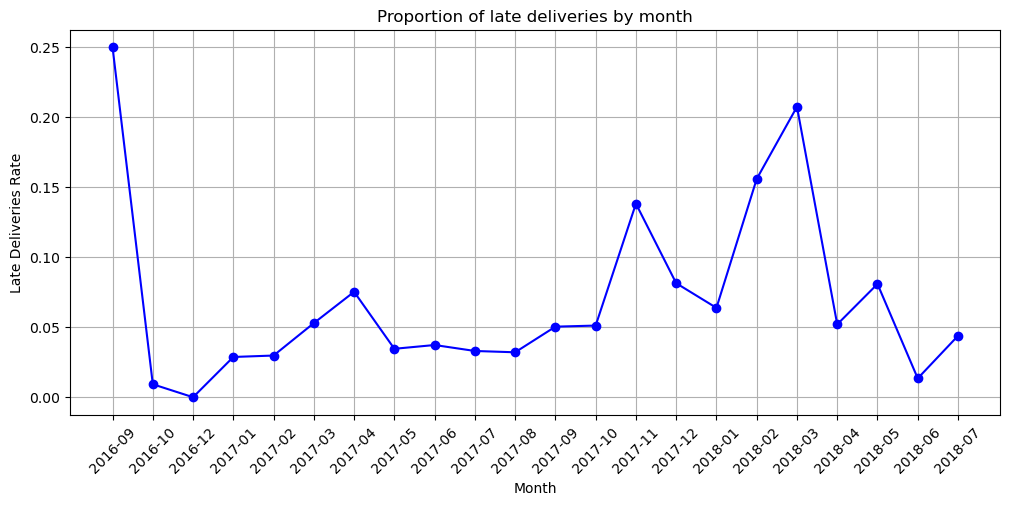

In [21]:
# Plotting
plt.figure(figsize = (12, 5))
plt.plot(late_by_month.index.astype(str), late_by_month.values, marker='o', color="blue")
plt.title("Proportion of late deliveries by month")
plt.xlabel("Month")
plt.ylabel("Late Deliveries Rate")
plt.grid(True)
plt.xticks (rotation=45)
plt.show()